## Importing libraries

In [7]:
import tensorflow as tf
import os
import shutil
import random## os, random,shutil libraries are used in python for file and directory operations.
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array,save_img
import xml.etree.ElementTree as ET

## Applying artifical neural network algorithm

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

In [10]:
# Set the target image size for resizing
target_size = (257, 360)

# Set the paths to the train, test, and validation directories
train_dir =r'C:\Users\rakes\Weed_classification\weed_image_data\Ronin_OPEN_DB\slpit_dataset\train'
test_dir = r'C:\Users\rakes\Weed_classification\weed_image_data\Ronin_OPEN_DB\slpit_dataset\test'
valid_dir = r'C:\Users\rakes\Weed_classification\weed_image_data\Ronin_OPEN_DB\slpit_dataset\validation'

# Set the number of classes
num_classes = 2

# Define the batch size
batch_size = 32

# Create the ImageDataGenerators for train, test, and validation sets
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True,
                                   zoom_range=0.2)

test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=target_size,
                                                    batch_size=batch_size,
                                                    class_mode='sparse',
                                                    shuffle=True)

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=target_size,
                                                  batch_size=batch_size,
                                                  class_mode='sparse',
                                                  shuffle=False)

valid_generator = test_datagen.flow_from_directory(valid_dir,
                                                   target_size=target_size,
                                                   batch_size=batch_size,
                                                   class_mode='sparse',
                                                   shuffle=False)

# Define the model architecture
model = Sequential([
    Flatten(input_shape=(target_size[0], target_size[1], 3)),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model
model.fit(train_generator,
          steps_per_epoch=train_generator.n // batch_size,
          validation_data=valid_generator,
          validation_steps=valid_generator.n // batch_size,
          epochs=6)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

Found 5034 images belonging to 2 classes.
Found 1367 images belonging to 2 classes.
Found 1382 images belonging to 2 classes.
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 277560)            0         
                                                                 
 dense_3 (Dense)             (None, 128)               35527808  
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 2)                 130  

In [4]:
import pickle

In [ ]:
filename='weed_classify_ANN_model'
pickle.dump(model,open(filename,'wb'))

In [6]:
model.save('weed_classify_ANN')

INFO:tensorflow:Assets written to: weed_classify_ANN.h6\assets


## Applying Support vector machine algo

In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn import svm
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

# Set the target image size for resizing
target_size = (128, 128)

# Set the paths to the train, test, and validation directories
train_dir = r'C:\Users\rakes\Weed_classification\weed_image_data\Ronin_OPEN_DB\slpit_dataset\train'
test_dir = r'C:\Users\rakes\Weed_classification\weed_image_data\Ronin_OPEN_DB\slpit_dataset\test'
valid_dir = r'C:\Users\rakes\Weed_classification\weed_image_data\Ronin_OPEN_DB\slpit_dataset\validation'

# Create an ImageDataGenerator for feature extraction
datagen = ImageDataGenerator(rescale=1.0/255)

# Extract features from the training set
train_features = []
train_labels = []

for class_name in os.listdir(train_dir):
    class_dir = os.path.join(train_dir, class_name)
    for filename in os.listdir(class_dir):
        image_path = os.path.join(class_dir, filename)
        image = tf.keras.preprocessing.image.load_img(image_path, target_size=target_size)
        feature = tf.keras.preprocessing.image.img_to_array(image)
        train_features.append(feature)
        train_labels.append(class_name)

train_features = np.array(train_features)
train_labels = np.array(train_labels)

# Reshape the feature vectors
train_features = train_features.reshape(train_features.shape[0], -1)

# Scale the feature vectors
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)

# Create and train the SVM classifier
classifier = svm.SVC(kernel='linear')
classifier.fit(train_features, train_labels)

# Extract features from the validation set
valid_features = []
valid_labels = []

for class_name in os.listdir(valid_dir):
    class_dir = os.path.join(valid_dir, class_name)
    for filename in os.listdir(class_dir):
        image_path = os.path.join(class_dir, filename)
        image = tf.keras.preprocessing.image.load_img(image_path, target_size=target_size)
        feature = tf.keras.preprocessing.image.img_to_array(image)
        valid_features.append(feature)
        valid_labels.append(class_name)

valid_features = np.array(valid_features)
valid_labels = np.array(valid_labels)

# Reshape the feature vectors
valid_features = valid_features.reshape(valid_features.shape[0], -1)

# Scale the feature vectors
valid_features = scaler.transform(valid_features)

# Predict on the validation set
valid_predictions = classifier.predict(valid_features)

# Evaluate the performance
accuracy = accuracy_score(valid_labels, valid_predictions)
report = classification_report(valid_labels, valid_predictions)

print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

Accuracy: 0.8994211287988423
Classification Report:
              precision    recall  f1-score   support

        crop       0.81      0.90      0.85       446
        weed       0.95      0.90      0.92       936

    accuracy                           0.90      1382
   macro avg       0.88      0.90      0.89      1382
weighted avg       0.90      0.90      0.90      1382



In [11]:
 import joblib

# ... previous code to train the SVM model ...

# Save the trained model
model_filename = 'svm_model.pkl'
joblib.dump(classifier, model_filename)

['svm_model.pkl']

## Visualisation of result

In [18]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Load the saved model
with open('svm_model.pkl', 'rb') as file:
    model = pickle.load(file)

#import os
import numpy as np
from PIL import Image
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Set the target image size for resizing
target_size = (128, 128)

# Function to load and preprocess the images
def preprocess_image(image_path):
    image = Image.open(image_path).convert('RGB')
    image = image.resize(target_size)
    image = np.array(image)
    return image

# Extract test data and test labels
test_images = []
test_labels = []

for class_name in os.listdir(test_dir):
    class_dir = os.path.join(test_dir, class_name)
    for filename in os.listdir(class_dir):
        image_path = os.path.join(class_dir, filename)
        image = preprocess_image(image_path)
        test_images.append(image)
        test_labels.append(class_name)

test_images = np.array(test_images)
test_labels = np.array(test_labels)

# Assuming you have loaded the model using pickle and stored it in the 'model' variable

# Make predictions using the loaded model
predictions = model.predict(test_images)

# Compute the confusion matrix
confusion_mat = confusion_matrix(test_labels, predictions)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_mat)

# Plot the confusion matrix heatmap
class_names = ['crop', 'weed']  # Replace with your class names
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

UnpicklingError: invalid load key, '\x00'.

## applying KNN algorithm for classification

In [1]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Set the paths to the train, test, and validation directories
train_dir = r'C:\Users\rakes\Weed_classification\weed_image_data\Ronin_OPEN_DB\slpit_dataset\train'
test_dir = r'C:\Users\rakes\Weed_classification\weed_image_data\Ronin_OPEN_DB\slpit_dataset\test'
valid_dir = r'C:\Users\rakes\Weed_classification\weed_image_data\Ronin_OPEN_DB\slpit_dataset\validation'


# Set the target image size for resizing
target_size = (128, 128)

# Function to load and preprocess the images
def preprocess_image(image_path):
    image = Image.open(image_path).convert('RGB')
    image = image.resize(target_size)
    image = np.array(image)
    return image.flatten()

# Load the training images and labels
train_images = []
train_labels = []

for class_name in os.listdir(train_dir):
    class_dir = os.path.join(train_dir, class_name)
    for filename in os.listdir(class_dir):
        image_path = os.path.join(class_dir, filename)
        image = preprocess_image(image_path)
        train_images.append(image)
        train_labels.append(class_name)

train_images = np.array(train_images)
train_labels = np.array(train_labels)

# Load the test images and labels
test_images = []
test_labels = []

for class_name in os.listdir(test_dir):
    class_dir = os.path.join(test_dir, class_name)
    for filename in os.listdir(class_dir):
        image_path = os.path.join(class_dir, filename)
        image = preprocess_image(image_path)
        test_images.append(image)
        test_labels.append(class_name)

test_images = np.array(test_images)
test_labels = np.array(test_labels)

# Split the training data into training and validation sets
train_images, valid_images, train_labels, valid_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

# Create and train the KNN classifier
k = 3  # Number of neighbors
classifier = KNeighborsClassifier(n_neighbors=k)
classifier.fit(train_images, train_labels)

# Predict on the validation set
valid_predictions = classifier.predict(valid_images)

# Evaluate the performance on the validation set
accuracy = accuracy_score(valid_labels, valid_predictions)
report = classification_report(valid_labels, valid_predictions)

print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

# Predict on the test set
test_predictions = classifier.predict(test_images)

# Evaluate the performance on the test set
accuracy = accuracy_score(test_labels, test_predictions)
report = classification_report(test_labels, test_predictions)

print("Accuracy on test set:", accuracy)
print("Classification Report on test set:")
print(report)

C:\Users\rakes\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy: 0.8848063555114201
Classification Report:
              precision    recall  f1-score   support

        crop       0.84      0.89      0.86       411
        weed       0.92      0.88      0.90       596

    accuracy                           0.88      1007
   macro avg       0.88      0.89      0.88      1007
weighted avg       0.89      0.88      0.89      1007

Accuracy on test set: 0.880760790051207
Classification Report on test set:
              precision    recall  f1-score   support

        crop       0.79      0.86      0.82       444
        weed       0.93      0.89      0.91       923

    accuracy                           0.88      1367
   macro avg       0.86      0.87      0.87      1367
weighted avg       0.88      0.88      0.88      1367



C:\Users\rakes\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


## KNN result visualisation

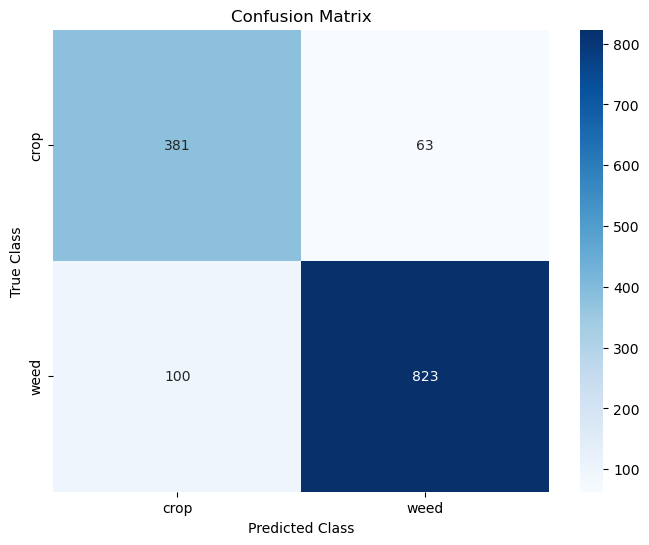

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create a list of class labels
class_labels = ["crop", "weed"]

# Create a confusion matrix
cm = confusion_matrix(test_labels, test_predictions)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

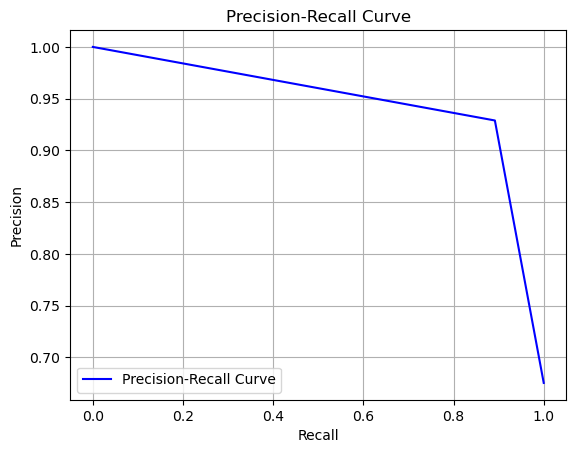

In [17]:
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Convert labels to numerical values
label_encoder = LabelEncoder()
numerical_test_labels = label_encoder.fit_transform(test_labels)
numerical_test_predictions = label_encoder.transform(test_predictions)

# Calculate precision and recall values
precision, recall, _ = precision_recall_curve(numerical_test_labels, numerical_test_predictions, pos_label=1)

# Plot the precision-recall curve
plt.plot(recall, precision, color='b', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

## SVM result visualisation 

Confusion Matrix:
[[403  43]
 [ 96 840]]


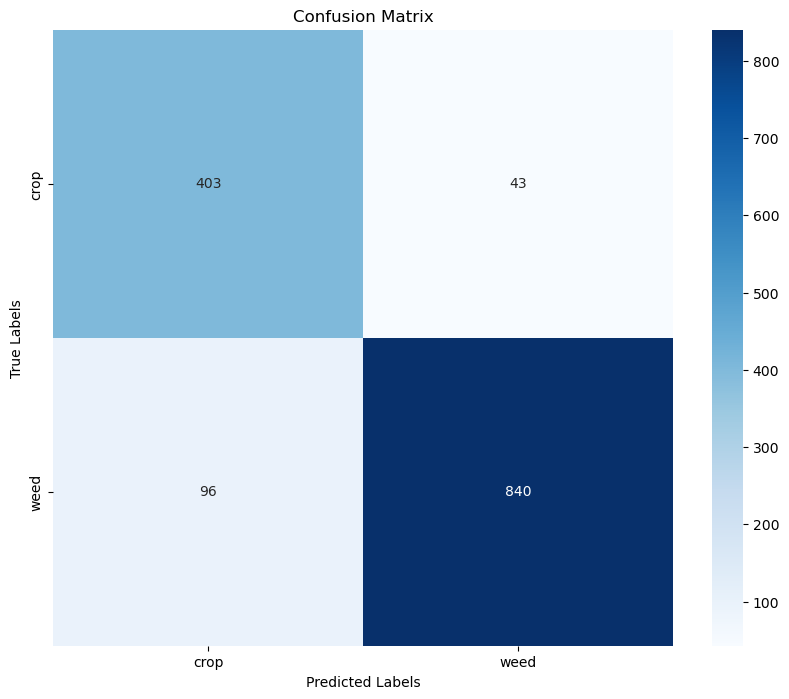

In [7]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(valid_labels, valid_predictions)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

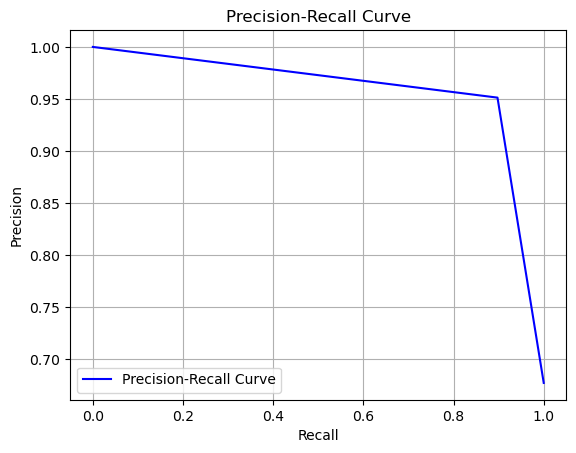

In [13]:
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Convert labels to numerical values
label_encoder = LabelEncoder()
numerical_test_labels = label_encoder.fit_transform(valid_labels)
numerical_test_predictions = label_encoder.transform(valid_predictions)

# Calculate precision and recall values
precision, recall, _ = precision_recall_curve(numerical_test_labels, numerical_test_predictions, pos_label=1)

# Plot the precision-recall curve
plt.plot(recall, precision, color='b', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

## Aritifical neural network result visualisation

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Convert true labels and predicted labels to class labels
true_labels = np.array([class_labels[i] for i in test_generator.classes])
pred_labels = np.array([class_labels[i] for i in test_pred_labels])

# Compute confusion matrix
cm = confusion_matrix(true_labels, pred_labels, labels=class_labels)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

NameError: name 'test_generator' is not defined

43/43 [==============================] - 8s 193ms/step


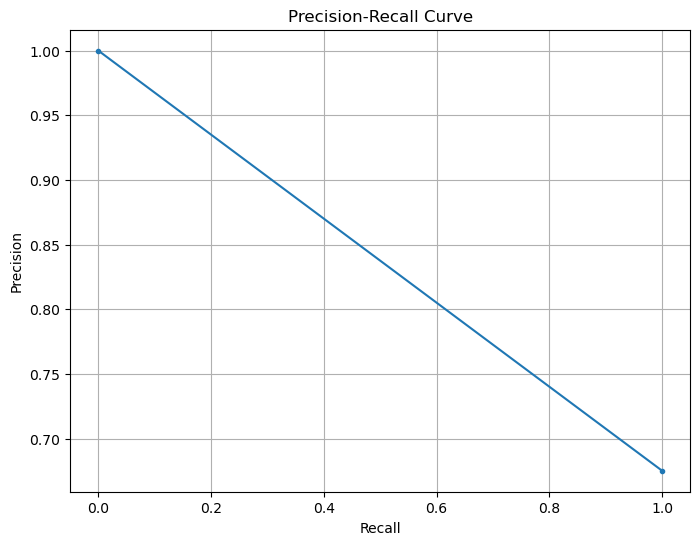

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Get predicted probabilities for the positive class
test_pred_probs = model.predict_proba(test_generator)[:, 1]

# Compute precision and recall
precision, recall, _ = precision_recall_curve(test_labels, test_pred_probs)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

In [5]:
tp = 444
fp = 0
fn = 923

precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)

print("F1 Score:", f1_score)
print("Recall:", recall)

F1 Score: 0.49033683048039756
Recall: 0.3247988295537674
